In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [3]:
import pandas as pd
sub_text = '[^a-zA-Zㄱ-ㅣ가-힣0-9]'

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/sw전문인재양성프로그램/1차미니프로젝트(질병진단)/중복제거증상찐찐찐최종.csv")

In [7]:
dataset.head()

,symptom,label
0,어제 감기 기운이 있었습니다증상은 콧물 재취기 코막힘과 더불어 입안 양쪽 입볼쪽이 ...,감기
1,한 2주 좀 전부터 감기 걸렸을때처럼 몸살기가 생겨서 없어지지가 않습니다꾸준히 몸이...,감기
2,4시간 전부터 몸이 살짝 으슬으슬하더니 근육통이 올거 같은 느낌이었습니다 2시간 전...,독감
3,4시간 전 으슬으슬한 기운과 근육통이 오는거 같은 기분이었습니다 2시간 전 으슬으슬...,독감
4,14개월 아기입니다 감기기운 발열 콧물 기침 있어 처방받았는데요보통 해열제는 38...,감기


In [9]:
k_stopword = pd.read_csv('/content/drive/MyDrive/sw전문인재양성프로그램/1차미니프로젝트(질병진단)/korean_stopword.csv')

stopword = list(k_stopword['불용어']) + ['을','를','이가','과','의','는','가','이','은','들','좀','잘','걍','과','도','를','으로',
                                      '자','에','와','한','하다','있다','되다','에서']
stopword[:5]

['이', '있', '하', '것', '들']

In [10]:
from konlpy.tag import Okt
okt = Okt()

morphs_lst = []
for i in dataset.index:
  morphs = ""
  morph = okt.morphs(dataset.loc[i]['symptom'])
  for txt in morph:
    if txt not in stopword:
      morphs = morphs + " " + txt
  morphs_lst.append(morphs)
dataset['morphs'] = morphs_lst
dataset.head()

,symptom,label,morphs
0,어제 감기 기운이 있었습니다증상은 콧물 재취기 코막힘과 더불어 입안 양쪽 입볼쪽이 ...,감기,어제 감기 기운 있었습니다 증상 콧물 재 취기 코 막힘과 더불어 입안 양쪽 입볼쪽...
1,한 2주 좀 전부터 감기 걸렸을때처럼 몸살기가 생겨서 없어지지가 않습니다꾸준히 몸이...,감기,2 부터 감기 걸렸을 처럼 몸 살기 생겨서 없어지지가 않습니다 꾸준히 몸 안좋 게...
2,4시간 전부터 몸이 살짝 으슬으슬하더니 근육통이 올거 같은 느낌이었습니다 2시간 전...,독감,4시간 부터 몸 살짝 으슬으슬 하더니 근육통 올거 같은 느낌이었습니다 2시간 파워...
3,4시간 전 으슬으슬한 기운과 근육통이 오는거 같은 기분이었습니다 2시간 전 으슬으슬...,독감,4시간 으슬으슬 기운 근육통 오는거 같은 기분 이었습니다 2시간 으슬으슬 하고 근...
4,14개월 아기입니다 감기기운 발열 콧물 기침 있어 처방받았는데요보통 해열제는 38...,감기,14 개월 아기 입니다 감기 기운 발열 콧물 기침 있어 처방 받았는데요 보통 해열...


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17173 entries, 0 to 17172
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   symptom  17173 non-null  object
 1   label    17173 non-null  object
 2   morphs   17173 non-null  object
dtypes: object(3)
memory usage: 402.6+ KB


In [12]:
import pandas as pd
sub_text = '[^a-zA-Zㄱ-ㅣ가-힣0-9]'

In [13]:
type(dataset)

pandas.core.frame.DataFrame

In [14]:
dataset.replace('안녕하세요','', regex=True, inplace = True)

In [15]:
dataset.replace('감사합니다','', regex=True, inplace = True)

In [16]:
dataset.replace('부탁합니다','', regex=True, inplace = True)

In [17]:
dataset.replace('정상인가요','', regex=True, inplace = True)

In [18]:
dataset.replace('질문드립니다','', regex=True, inplace = True)

In [19]:
dataset

,symptom,label,morphs
0,어제 감기 기운이 있었습니다증상은 콧물 재취기 코막힘과 더불어 입안 양쪽 입볼쪽이 ...,감기,어제 감기 기운 있었습니다 증상 콧물 재 취기 코 막힘과 더불어 입안 양쪽 입볼쪽...
1,한 2주 좀 전부터 감기 걸렸을때처럼 몸살기가 생겨서 없어지지가 않습니다꾸준히 몸이...,감기,2 부터 감기 걸렸을 처럼 몸 살기 생겨서 없어지지가 않습니다 꾸준히 몸 안좋 게...
2,4시간 전부터 몸이 살짝 으슬으슬하더니 근육통이 올거 같은 느낌이었습니다 2시간 전...,독감,4시간 부터 몸 살짝 으슬으슬 하더니 근육통 올거 같은 느낌이었습니다 2시간 파워...
3,4시간 전 으슬으슬한 기운과 근육통이 오는거 같은 기분이었습니다 2시간 전 으슬으슬...,독감,4시간 으슬으슬 기운 근육통 오는거 같은 기분 이었습니다 2시간 으슬으슬 하고 근...
4,14개월 아기입니다 감기기운 발열 콧물 기침 있어 처방받았는데요보통 해열제는 38...,감기,14 개월 아기 입니다 감기 기운 발열 콧물 기침 있어 처방 받았는데요 보통 해열...
...,...,...,...
17168,저는 20살이고 40대 후반 엄마가 있습니다 거의 10년전 제가 초등학생때 엄마가 ...,협심증,20 살이 40 대 후반 엄마 있습니다 거의 10년 초등학생 엄마 가슴 통증 호흡...
17169,오년전부터 증상이있엇구요 170 정도 뛰어서 응급실주사 여러번맞앗습니다 근데 한번맞...,협심증,년전 부터 증상 엇구 170 뛰어서 응급실 주사 여러 맞앗습니다 근데 한번 맞고 ...
17170,다름이 아니고 어렸을때부터 앉았다 일어날때 혹은 다리를 한번 굽혔다 필때 무릎에서...,협심증,다름이 아니고 어렸을 부터 앉았다 일어날 혹은 다리 한번 굽혔다 필때 무릎 뼈 ...
17171,제 질문을 보고 보아주셔서 그럼 제가 가지고 있는 증상에 대해서 이야기를 할테니...,협심증,질문 보고 보아주셔서 그럼 있는 증상 대해 서 이야기 할테니 소견 부탁 드립니...


In [20]:
dataset.loc[(dataset['label'] == "감기"), 'label'] = 0
dataset.loc[(dataset['label'] == "폐렴"), 'label'] = 1
dataset.loc[(dataset['label'] == "독감"), 'label'] = 2
dataset.loc[(dataset['label'] == "과호흡"), 'label'] = 3
dataset.loc[(dataset['label'] == "장염"), 'label'] = 4
dataset.loc[(dataset['label'] == "대장염"), 'label'] = 5
dataset.loc[(dataset['label'] == "고혈압"), 'label'] = 6
dataset.loc[(dataset['label'] == "협심증"), 'label'] = 7
dataset.loc[(dataset['label'] == "심근경색"), 'label'] = 8
dataset.loc[(dataset['label'] == "공황장애"), 'label'] = 9

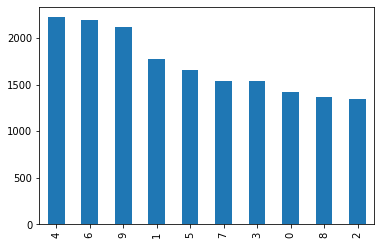

In [21]:
dataset['label'].value_counts().plot(kind = 'bar')

In [22]:
dataset

,symptom,label,morphs
0,어제 감기 기운이 있었습니다증상은 콧물 재취기 코막힘과 더불어 입안 양쪽 입볼쪽이 ...,0,어제 감기 기운 있었습니다 증상 콧물 재 취기 코 막힘과 더불어 입안 양쪽 입볼쪽...
1,한 2주 좀 전부터 감기 걸렸을때처럼 몸살기가 생겨서 없어지지가 않습니다꾸준히 몸이...,0,2 부터 감기 걸렸을 처럼 몸 살기 생겨서 없어지지가 않습니다 꾸준히 몸 안좋 게...
2,4시간 전부터 몸이 살짝 으슬으슬하더니 근육통이 올거 같은 느낌이었습니다 2시간 전...,2,4시간 부터 몸 살짝 으슬으슬 하더니 근육통 올거 같은 느낌이었습니다 2시간 파워...
3,4시간 전 으슬으슬한 기운과 근육통이 오는거 같은 기분이었습니다 2시간 전 으슬으슬...,2,4시간 으슬으슬 기운 근육통 오는거 같은 기분 이었습니다 2시간 으슬으슬 하고 근...
4,14개월 아기입니다 감기기운 발열 콧물 기침 있어 처방받았는데요보통 해열제는 38...,0,14 개월 아기 입니다 감기 기운 발열 콧물 기침 있어 처방 받았는데요 보통 해열...
...,...,...,...
17168,저는 20살이고 40대 후반 엄마가 있습니다 거의 10년전 제가 초등학생때 엄마가 ...,7,20 살이 40 대 후반 엄마 있습니다 거의 10년 초등학생 엄마 가슴 통증 호흡...
17169,오년전부터 증상이있엇구요 170 정도 뛰어서 응급실주사 여러번맞앗습니다 근데 한번맞...,7,년전 부터 증상 엇구 170 뛰어서 응급실 주사 여러 맞앗습니다 근데 한번 맞고 ...
17170,다름이 아니고 어렸을때부터 앉았다 일어날때 혹은 다리를 한번 굽혔다 필때 무릎에서...,7,다름이 아니고 어렸을 부터 앉았다 일어날 혹은 다리 한번 굽혔다 필때 무릎 뼈 ...
17171,제 질문을 보고 보아주셔서 그럼 제가 가지고 있는 증상에 대해서 이야기를 할테니...,7,질문 보고 보아주셔서 그럼 있는 증상 대해 서 이야기 할테니 소견 부탁 드립니...


In [23]:
from sklearn.model_selection import train_test_split

X = dataset['morphs']
y = dataset['label'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [24]:
print('X학습 데이터의 수 :', X_train.shape[0])
print('Y학습 데이터의 수 :', y_train.shape[0])
print('X테스트 데이터의 수 :', X_test.shape[0])
print('Y테스트 데이터의 수 :', y_test.shape[0])

X학습 데이터의 수 : 13738
Y학습 데이터의 수 : 13738
X테스트 데이터의 수 : 3435
Y테스트 데이터의 수 : 3435


In [25]:
y_test.value_counts()

4.0    459
9.0    457
6.0    434
1.0    346
5.0    316
3.0    309
7.0    301
0.0    298
2.0    263
8.0    252
Name: label, dtype: int64

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩(사전만들기)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [27]:
print(tokenizer.word_index)

{'증상': 1, '약': 2, '병원': 3, '하고': 4, '부터': 5, '검사': 6, '너무': 7, '계속': 8, '느낌': 9, '심장': 10, '가슴': 11, '입니다': 12, '만': 13, '많이': 14, '설사': 15, '기침': 16, '호흡': 17, '혈압': 18, '통증': 19, '증세': 20, '다': 21, '숨': 22, '목': 23, '갑자기': 24, '못': 25, '공황장애': 26, '감기': 27, '배': 28, '2': 29, '장염': 30, '인가요': 31, '몸': 32, '해서': 33, '먹고': 34, '합니다': 35, '치료': 36, '머리': 37, '오늘': 38, '복용': 39, '할': 40, '조금': 41, '고혈압': 42, '있습니다': 43, '게': 44, 'ㅠㅠ': 45, '서': 46, '에는': 47, '그냥': 48, '걱정': 49, '1': 50, '인': 51, '인데': 52, '열': 53, '그래서': 54, '3': 55, '인지': 56, '하는': 57, '근데': 58, '같은': 59, '혹시': 60, '했는데': 61, '어제': 62, '폐렴': 63, '아프고': 64, '스트레스': 65, '아침': 66, '성': 67, '있는': 68, '이상': 69, '하루': 70, '한번': 71, '가끔': 72, '운동': 73, '몇': 74, '하는데': 75, '독감': 76, '협심증': 77, '처방': 78, '씩': 79, '하면': 80, '변': 81, '자주': 82, '요즘': 83, '답변': 84, '날': 85, '가서': 86, '쪽': 87, '했습니다': 88, '어떻게': 89, '정상': 90, '상태': 91, '해야': 92, '약간': 93, '음식': 94, '달': 95, '두통': 96, '심근경색': 97, '시작': 98, '정말': 99, '가래': 100, '그런데': 10

In [28]:
total_cnt = len(tokenizer.word_index)
print(total_cnt)

65103


In [29]:
threshold = 3
total_cnt = len(tokenizer.word_index) #단어의 수
rare_cnt = 0
total_freq = 0
rare_freq = 0

#단어와 빈도수의 쌍을 key와 value로 받는다
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  #단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
     rare_cnt = rare_cnt + 1
     rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수:%s'%(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt / total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', \
      (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 65103
등장 빈도가 2번 이하인 희귀 단어의 수:44054
단어 집합에서 희귀 단어의 비율: 67.66815661336652
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.013629422426465


In [30]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패팅 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 21051


In [31]:
tokenizer = Tokenizer(total_cnt, oov_token= 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

문서의 최대 길이 : 1782
문서의 평균 길이 : 76.50567768234095


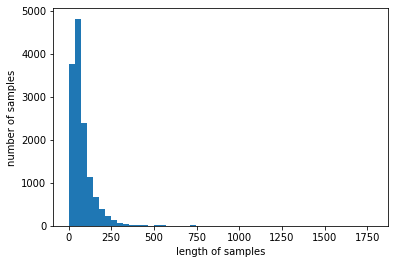

In [32]:
import matplotlib.pyplot as plt

print('문서의 최대 길이 :', max(len(l) for l in X_train))
print('문서의 평균 길이 :', sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list)) * 100))

In [34]:
max_len = 220
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 220 이하인 샘플의 비율: 96.20032027951667


In [35]:
from tensorflow.keras.preprocessing import sequence

print('시퀀스 패딩(sample * time)')
X_train = sequence.pad_sequences(X_train, maxlen = max_len)
X_test = sequence.pad_sequences(X_test, maxlen = max_len)
print('X_train 크기 :',X_train.shape)
print('X_test 크기 :',X_test.shape)

시퀀스 패딩(sample * time)
X_train 크기 : (13738, 220)
X_test 크기 : (3435, 220)


In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 4회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', verbose=1, patience=10)
# ModelCheckpoint를 사용하여 검증 데이터의 
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model_LSTM3.h5', 
                     monitor='val_acc', mode='max', 
                     verbose=2, save_best_only=True)

## LSTM

In [37]:
from collections.abc import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from keras.layers import Dropout

model = Sequential()
model.add(Embedding(input_dim = total_cnt, output_dim = 64))
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(16))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [38]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50, callbacks=[mc], validation_split=0.2)

Epoch 1/50
344/344 [==============================] - ETA: 0s - loss: 1.6749 - acc: 0.3858
Epoch 1: val_acc improved from -inf to 0.49236, saving model to best_model_LSTM3.h5
344/344 [==============================] - 28s 45ms/step - loss: 1.6749 - acc: 0.3858 - val_loss: 1.3463 - val_acc: 0.4924
Epoch 2/50
343/344 [============================>.] - ETA: 0s - loss: 1.0316 - acc: 0.6252
Epoch 2: val_acc improved from 0.49236 to 0.66448, saving model to best_model_LSTM3.h5
344/344 [==============================] - 14s 40ms/step - loss: 1.0320 - acc: 0.6249 - val_loss: 1.0102 - val_acc: 0.6645
Epoch 3/50
344/344 [==============================] - ETA: 0s - loss: 0.7084 - acc: 0.7690
Epoch 3: val_acc improved from 0.66448 to 0.71543, saving model to best_model_LSTM3.h5
344/344 [==============================] - 13s 39ms/step - loss: 0.7084 - acc: 0.7690 - val_loss: 0.8641 - val_acc: 0.7154
Epoch 4/50
344/344 [==============================] - ETA: 0s - loss: 0.5066 - acc: 0.8477
Epoch 4: 

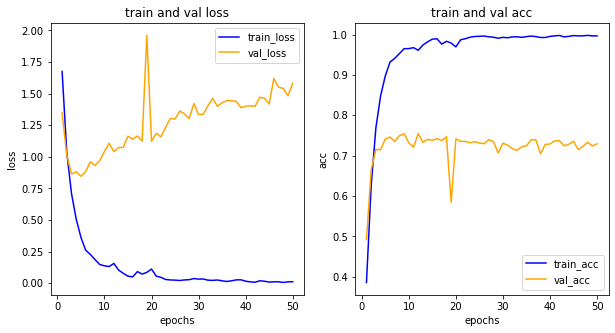

In [39]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize

def news_predict(news, max_len):

  word_tokens = word_tokenize(news)
  result = []
  for w in word_tokens:
      if w not in stopword:
          result.append(w)
  # 토큰화
  tokenizer = Tokenizer()
  words = tokenizer.texts_to_sequences(news)

  # 불용어제거
  result = []
  for token in words: 
      if token not in stopword: 
          result.append(token)

  # 벡터화
  vector = CountVectorizer()
  print(vector.fit_transform(result).toarray())

  #패딩
  dataset_df = sequence.pad_sequences(vector, maxlen = max_len)
  pred = okt.predict(dataset_df)


In [41]:
from konlpy.tag import Okt
okt = Okt()
new_label = ['감기', '폐렴', '독감', '과호흡', '장염', '대장염', '고혈압', '협심증', '심근경색', '공황장애']
news = "노란 가래가 있고"
load_model_LSTM = model
new_sentence = okt.morphs(news, stem=True) # 토큰화
new_sentence

['노랗다', '가래', '가', '있다']

In [42]:
new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
new_sentence

['노랗다', '가래']

In [43]:
encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
encoded

[[1, 101]]

In [44]:
pad_new = sequence.pad_sequences(encoded, maxlen = max_len)
pad_new

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [45]:
score = load_model_LSTM.predict(pad_new)
score

array([[0.0643378 , 0.07083558, 0.02339615, 0.04348334, 0.06549476,
        0.01207657, 0.6209864 , 0.05035275, 0.03993581, 0.00910086]],
      dtype=float32)

In [46]:
import numpy as np
np.argmax(score)

6

In [49]:
new_label[np.argmax(score)]

'고혈압'

In [53]:
import os
import tensorflow as tf
from tensorflow import keras
from konlpy.tag import Okt
okt = Okt()
new_label = ['감기', '폐렴', '독감', '과호흡', '장염', '대장염', '고혈압', '협심증', '심근경색', '공황장애']
news = "저녁을 먹고 구토랑 설사를 동반한 복통이 오는데 무슨 증상인가요"
new_model = tf.keras.models.load_model('/content/best_model_LSTM3.h5')
new_sentence = okt.morphs(news) # 토큰화
new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
pad_new = sequence.pad_sequences(encoded, maxlen = max_len)
score = new_model.predict(pad_new)
print(score)
import numpy as np
score_list = score.tolist()
np.argmax(score)
new_label[np.argmax(score)]

[[1.8553839e-03 2.0017680e-03 1.6456142e-02 7.6226867e-04 9.3632567e-01
  3.8760636e-02 1.9429919e-03 1.2870390e-03 1.0246520e-04 5.0576165e-04]]


'장염'

In [56]:
def predict(text):
  okt = Okt()
  new_label = ['감기', '폐렴', '독감', '과호흡', '장염', '대장염', '고혈압', '협심증', '심근경색', '공황장애']
  news = text
  new_model = tf.keras.models.load_model('/content/best_model_LSTM3.h5')
  new_sentence = okt.morphs(news) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len)
  score = new_model.predict(pad_new)
  print(score)
  import numpy as np
  score_list = score.tolist()
  np.argmax(score)
  new_label[np.argmax(score)]
  print(new_label[np.argmax(score)])

In [57]:
predict("저녁을 먹고 구토랑 설사를 동반한 복통이 오는데 무슨 증상인가요")    # 장염

[[1.8553839e-03 2.0017680e-03 1.6456142e-02 7.6226867e-04 9.3632567e-01
  3.8760636e-02 1.9429919e-03 1.2870390e-03 1.0246520e-04 5.0576165e-04]]
장염


In [58]:
predict('2주 동안 복통과 설사가 반복되고 체중도 조금 줄었는데 몇일 전부터는 혈변도 나와요 무슨 증상인가요')  # 대장염

[[5.2004430e-04 1.6852987e-03 1.3967208e-03 1.1015288e-03 6.0829270e-01
  3.8511336e-01 7.1405410e-04 7.8941736e-04 1.1158984e-04 2.7543274e-04]]
장염


In [59]:
predict('당뇨가 있는데 혈변을 합니다 무슨 증상인가요')   # 대장염

[[0.01864294 0.03943164 0.03264924 0.05442083 0.20761772 0.58713764
  0.00702321 0.02001778 0.00997209 0.02308694]]
대장염


In [60]:
predict('피로감이 동반된 고열이랑 인후통이 있어요 이건 무슨 병일까요?ㅜ')   # 독감

[[1.3103858e-01 8.0507785e-01 5.9059989e-03 8.0044996e-03 1.4126995e-04
  1.7775209e-03 3.7679211e-03 1.9409297e-03 4.1459050e-02 8.8646647e-04]]
폐렴


In [61]:
predict('기침도 하고 열도 많이 나서 약을 먹었는데 일주일 넘게 증상이 계속돼요 무슨 증상인가요')  # 폐렴

[[8.74528706e-01 7.79679697e-03 1.13000154e-01 4.37536102e-04
  3.50204151e-04 4.36604110e-04 1.59033400e-03 4.43408731e-04
  6.98543503e-04 7.17711053e-04]]
감기


In [62]:
predict('혈압은 정상인데 두통이랑 고열이 있습니다 가래도 끓고요 무슨 증상인가요')  # 폐렴

[[0.87382746 0.0358147  0.05417619 0.0038674  0.0014405  0.00150803
  0.01734821 0.00108867 0.00934892 0.00157988]]
감기


In [63]:
predict('미열이 있고 근육통도 있는데 그냥 감기일까요')  # 감기

[[0.36073187 0.02886399 0.5793442  0.00115503 0.01068254 0.00702271
  0.00459888 0.00071949 0.00471908 0.00216227]]
독감


In [64]:
predict('갑자기 몇일전부터 몸이 피로하고 열이 38 37.8 38.1 왔다갔다하고 기침도 하는데 무슨 증상인가요')  # 독감

[[9.6213371e-01 2.2224182e-02 9.0003517e-03 1.8526113e-03 6.6722692e-05
  5.4830784e-04 9.3159324e-04 1.2790205e-04 2.8569158e-03 2.5775252e-04]]
감기


In [65]:
predict('갑자기 죽을 것 처럼 호흡이 가빠지고, 어지럽고 식은땀도 나는데 왜 이러는 건가요')  # 공황장애

[[7.4098789e-05 9.4515830e-04 1.2042633e-05 9.8838019e-01 1.5470696e-04
  2.9674345e-03 1.9360532e-04 1.1941656e-03 4.7951241e-04 5.5990024e-03]]
과호흡


In [66]:
predict('호흡이 가빠지고 심장이 두근거리고 가슴 쪽에 불쾌한 감정이 들면서 급격히 증상이 나빠져 죽거나 미칠지도 모르겠다는 불안이 요 며칠 수십분 지속되고 있습니다. 병원에서는 폐나 뇌에 이상이 생기지는 않았다는데 무슨 증상일까요')  # 공황장애

[[5.9605609e-05 9.4804395e-04 1.6844069e-05 9.8270333e-01 2.0748230e-04
  3.3809626e-03 2.2165630e-04 2.3220645e-03 8.9545932e-04 9.2445090e-03]]
과호흡


In [72]:
predict('사람들 많은 곳에서 과호흡이 왔는데 몸의 압박감이랑 죽을 것 같은 느낌이 들 정도로 힘들었는데 무슨 증상인가요')   # 공황장애

[[7.6604781e-05 9.7368885e-04 9.8767860e-06 9.8907894e-01 1.3692598e-04
  3.0339763e-03 1.7487482e-04 9.8718703e-04 4.8447770e-04 5.0433860e-03]]
과호흡


In [67]:
predict('호흡이 불안정하고 손이 떨리고 종종 어지러운데 무슨 증상인가요ㅠㅠ')  # 과호흡

[[1.4996847e-04 9.6788479e-04 3.9318391e-05 9.6752262e-01 2.4199013e-04
  3.6452024e-03 6.2277279e-04 2.1070512e-03 7.4157171e-04 2.3961531e-02]]
과호흡


In [68]:
predict('가슴 뼈 안쪽이 조이는 듯한 통증이 있고 어제는 구토를 했었는데 무슨 증상인가요')  # 심근경색

[[6.2078587e-04 8.9363158e-03 2.6227857e-04 1.5650747e-03 5.2712971e-05
  8.0058067e-05 3.3728471e-03 1.2943423e-01 8.5316193e-01 2.5137286e-03]]
심근경색


In [69]:
predict('두통이나 어지러움, 피로감이 있어요')  # 고혈압

[[0.12062662 0.1072917  0.09947424 0.07534464 0.0709004  0.0534219
  0.14875358 0.1011238  0.15253785 0.07052523]]
심근경색


In [70]:
predict('운동하고 난 뒤에 5분정도 가슴에 통증이 있었는데 무슨 증상인가요?')  #협심증

[[0.00362533 0.01614133 0.0247538  0.05210759 0.4074324  0.23991218
  0.06418022 0.09895055 0.02070622 0.07219034]]
장염


In [71]:
predict('가슴을 쥐어짜는 통증이 어깨랑 목으로 퍼져나가고 숨이 찬데 무슨 증상인가요')  # 심근경색

[[2.1689426e-04 4.2747767e-03 3.2982294e-05 8.9671556e-04 6.6184502e-06
  2.7950151e-05 4.8637149e-04 1.3144380e-02 9.8047721e-01 4.3606630e-04]]
심근경색


In [73]:
predict('운동 후에 가슴을 짓누르는 듯한 통증이 나타나고 피로감이 동반된 고열이랑 인후통, 근육통이 있습니다. 무슨 증상인가요')   # 협심증 + 독감

[[1.3812076e-03 1.7925102e-03 6.5342349e-05 2.0299465e-03 3.1221675e-06
  7.3173964e-05 6.0209603e-04 1.6490055e-02 9.7692800e-01 6.3460477e-04]]
심근경색
